['4', '881.033', '9', '670', '1424', '21', '2331', '8', '2', '4401', '4582', '4907', '5733']
4
['4', '124.367', '7', '540', '13032', '57', '18485', '17', '1', '31170', '33946', '36665', '56763']
4
['4', '1577.6', '13', '811', '3357', '27', '5851', '7', '2', '10036', '10150', '10202', '10798']
4
['4', '211.333', '14', '596', '29915', '79', '45045', '28', '1', '74490', '79405', '84645', '94677']
4
['4', '1816.53', '18', '870', '6105', '40', '10494', '7', '2', '17518', '17632', '17678', '17756']
4
['4', '237.067', '29', '1055', '52332', '131', '80972', '38', '2', '131396', '148457', '152320', '164663']
4
['4', '2011.2', '25', '1049', '11324', '60', '19283', '8', '2', '31726', '31845', '31947', '32452']
4
['4', '260.267', '53', '1057', '93998', '198', '150687', '43', '2', '239928', '269559', '276233', '296251']
4
['4', '2140.8', '51', '1386', '21456', '104', '36717', '8', '2', '59692', '59964', '60024', '60168']
4
['4', '257.067', '92', '769', '185060', '580', '307168', '71', '3', '490943'

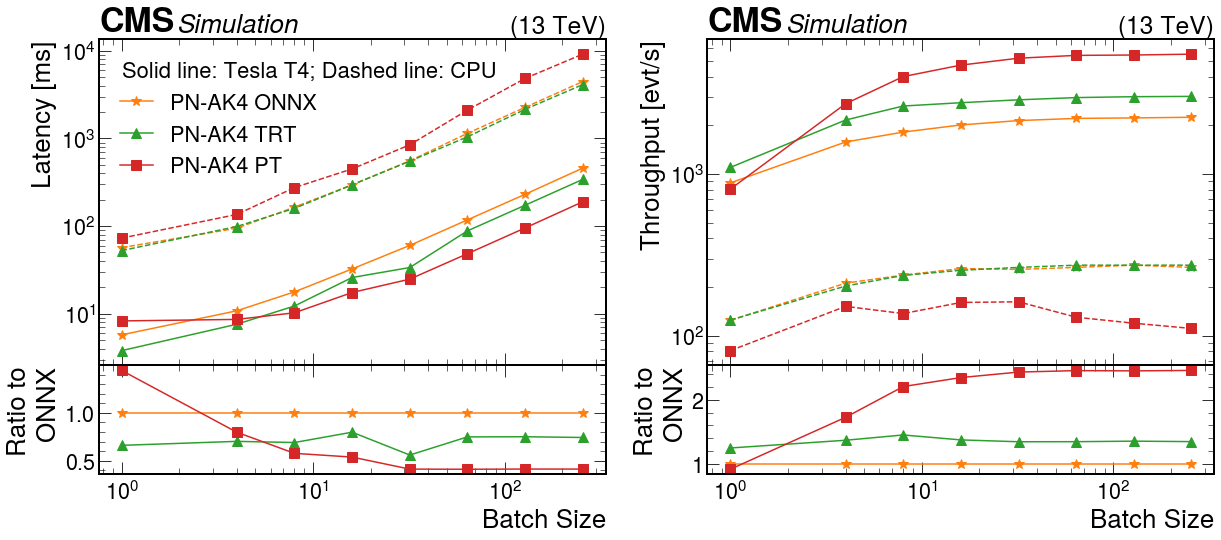

In [10]:
import csv
import os
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
# plotting style
import mplhep as hep
plt.style.use(hep.style.CMS)



throughputs = OrderedDict()
latencys = OrderedDict()

for model in ['particlenet_AK4', 'particlenet_AK4_PT', 'particlenet_AK4_TRT']:
    dirname = f'/Users/wmccorma/SONIC/explicit_model_file_location/{model}'
    if not os.path.isdir(dirname):
        continue
    throughputs[model] = OrderedDict()
    latencys[model] = OrderedDict()
    throughputs[model+"_CPU"] = OrderedDict()
    latencys[model+"_CPU"] = OrderedDict()

    for batch in [1, 4, 8, 16, 32, 64, 128, 256]:
        fname = f'{dirname}/{model}_batch{batch}.csv'
        #fname = f'{dirname}_CPU_CPU/{model}_batch{batch}.csv'
        if not os.path.isfile(fname):
            continue
        with open (fname, newline='') as csvfile:
            datareader = csv.reader(csvfile)
            for i, row in enumerate(datareader):
                if i!=1:
                    continue
                print(row)
                print(row[0])
            throughputs[model][batch] = float(row[1])
            latencys[model][batch] = float(row[-1])/1.0e3
            
        #fname = f'{dirname}/{model}_batch{batch}.csv'
        fname = f'{dirname}_CPU_CPU/{model}_batch{batch}.csv'
        if not os.path.isfile(fname):
            continue
        with open (fname, newline='') as csvfile:
            datareader = csv.reader(csvfile)
            for i, row in enumerate(datareader):
                if i!=1:
                    continue
                print(row)
                print(row[0])
            throughputs[model+"_CPU"][batch] = float(row[1])
            latencys[model+"_CPU"][batch] = float(row[-1])/1.0e3

labels = {
    'particlenet_AK4': 'PN-AK4 ONNX',
    'particlenet_AK4_PT': 'PN-AK4 PT',
    'particlenet_AK4_TRT': 'PN-AK4 TRT',
    'particlenet_AK4_CPU': 'PN-AK4 ONNX CPU',
    'particlenet_AK4_PT_CPU': 'PN-AK4 PT CPU',
    'particlenet_AK4_TRT_CPU': 'PN-AK4 TRT CPU',
}

markers = ['*', '^', 's', '1']
markers = ['*', '^', 's', '*', '^', 's']
linestyles = ['solid', 'solid', 'solid', 'dashed', 'dashed', 'dashed']
linecolors = ['tab:orange', 'tab:green', 'tab:red', 'tab:orange', 'tab:green', 'tab:red']

# make some throughputs and latency plots
def Plot(models, outputname):
    if len(models) == 0:
        return
    model = models[0]
    batchs = np.array(list(throughputs[model].keys()), dtype=np.float32)

    vals_throughput = [np.array(list(throughputs[model].values())) for model in models]
    vals_latency = [np.array(list(latencys[model].values())) for model in models]

    legends = [(labels[model] if("CPU" not in model) else '') for model in models]

    fig, axs = plt.subplots(2,2, figsize=(20,8), gridspec_kw={'height_ratios': [3, 1]})
    #axs[0, 0].plot([], [], ' ', label="Tesla T4")
    axs[0, 0].plot([], [], ' ', label=" ")
    axs[1, 0].plot([], [], ' ', label="Tesla T4")
    axs[0, 1].plot([], [], ' ', label="Tesla T4")
    axs[1, 1].plot([], [], ' ', label="Tesla T4")

    for i, model in enumerate(models):
        axs[0, 0].plot(batchs, vals_latency[i], label=legends[i], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[0, 1].plot(batchs, vals_throughput[i],    label=legends[i], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)

    for i, model in enumerate(models):
        axs[1, 0].plot(batchs, vals_latency[i]/vals_latency[0], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        axs[1, 1].plot(batchs, vals_throughput[i]/vals_throughput[0], color = linecolors[i], linestyle = linestyles[i], marker=markers[i], markersize=10)
        if(i > 1):
            break

    axs[1, 0].set_xlabel('Batch Size')
    axs[1, 0].set_ylabel('Ratio to\nONNX')
    axs[1, 0].set_xscale('log')
    axs[0, 0].set_ylabel('Latency [ms]')
    axs[0, 0].set_yscale('log')
    axs[0, 0].set_xticklabels([])
    axs[0, 0].set_xscale('log')
    axs[0, 0].text(1, 5000, 'Solid line: Tesla T4; Dashed line: CPU', fontsize = 22)
    axs[0, 0].legend()

    axs[1, 1].set_xlabel('Batch Size')
    axs[1, 1].set_ylabel('Ratio to\nONNX')
    axs[1, 1].set_xscale('log')
    axs[0, 1].set_ylabel('Throughput [evt/s]')
    axs[0, 1].set_yscale('log')
    axs[0, 1].set_xticklabels([])
    axs[0, 1].set_xscale('log')
    #axs[0, 1].legend()

    #hep.cms.label(label='Simulation', loc=0)
    hep.cms.label(loc=0, ax=axs[0,0])
    hep.cms.label(loc=0, ax=axs[0,1])
    #hep.cms.lumitext(text='Simulation', ax=None, fontname=None, fontsize=None)
    
    fig.subplots_adjust(hspace=0)
    fig.savefig(f"{outputname}.png")
    fig.savefig(f"{outputname}.pdf")
Plot(['particlenet_AK4', 'particlenet_AK4_TRT', 'particlenet_AK4_PT', 'particlenet_AK4_CPU', 'particlenet_AK4_TRT_CPU', 'particlenet_AK4_PT_CPU'], 'latencies_throughputs_pn')
#Plot(['particlenet_AK4', 'particlenet_AK4_PT'], 'Test')